In [34]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch
from typing import Dict
import os
from stable_baselines3.common.save_util import load_from_zip_file

# Net2DeeperNet Depth 8

In [35]:
base_path = "fehring_growing_nn_new_seeded/ant_net2deeper/22/(32, 0.2, None, 9.853902629348276e-05, 0.95, 0.00014592877169397115, 0.5, 5, 2048, True, 0.001, 0.99)/8/0/model.zip"
data, params, pytorch_variables = load_from_zip_file(base_path) 
# loda 

In [36]:
params["policy"].keys()

odict_keys(['log_std', 'features_extractor.input_layer.weight', 'features_extractor.input_layer.bias', 'features_extractor.net2deeper_network.sequential_container.0.weight', 'features_extractor.net2deeper_network.sequential_container.0.bias', 'features_extractor.net2deeper_network.sequential_container.2.weight', 'features_extractor.net2deeper_network.sequential_container.2.bias', 'features_extractor.net2deeper_network.sequential_container.4.weight', 'features_extractor.net2deeper_network.sequential_container.4.bias', 'features_extractor.net2deeper_network.sequential_container.6.weight', 'features_extractor.net2deeper_network.sequential_container.6.bias', 'features_extractor.net2deeper_network.sequential_container.8.weight', 'features_extractor.net2deeper_network.sequential_container.8.bias', 'features_extractor.net2deeper_network.sequential_container.10.weight', 'features_extractor.net2deeper_network.sequential_container.10.bias', 'features_extractor.net2deeper_network.sequential_conta

In [37]:
# First layer weights
first_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.0.weight"]
first_layer_weights = np.abs(first_layer_weights)
first_layer_weights = first_layer_weights[:50, :50]
# Second layer weights
second_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.2.weight"]
second_layer_weights = np.abs(second_layer_weights)
second_layer_weights = second_layer_weights[:50, :50]
# third layer weights
third_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.4.weight"]
third_layer_weights = np.abs(third_layer_weights)
third_layer_weights = third_layer_weights[:50, :50]
# fourth layer weights
fourth_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.6.weight"]
fourth_layer_weights = np.abs(fourth_layer_weights)
fourth_layer_weights = fourth_layer_weights[:50, :50]
# fifth layer weights
fifth_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.8.weight"]
fifth_layer_weights = np.abs(fifth_layer_weights)
fifth_layer_weights = fifth_layer_weights[:50, :50]
# sixth layer weights
sixth_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.10.weight"]
sixth_layer_weights = np.abs(sixth_layer_weights)
sixth_layer_weights = sixth_layer_weights[:50, :50]
# seventh layer weights
seventh_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.12.weight"]
seventh_layer_weights = np.abs(seventh_layer_weights)
seventh_layer_weights = seventh_layer_weights[:50, :50]
# eighth layer weights
eighth_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.14.weight"]
eighth_layer_weights = np.abs(eighth_layer_weights)
eighth_layer_weights = eighth_layer_weights[:50, :50]

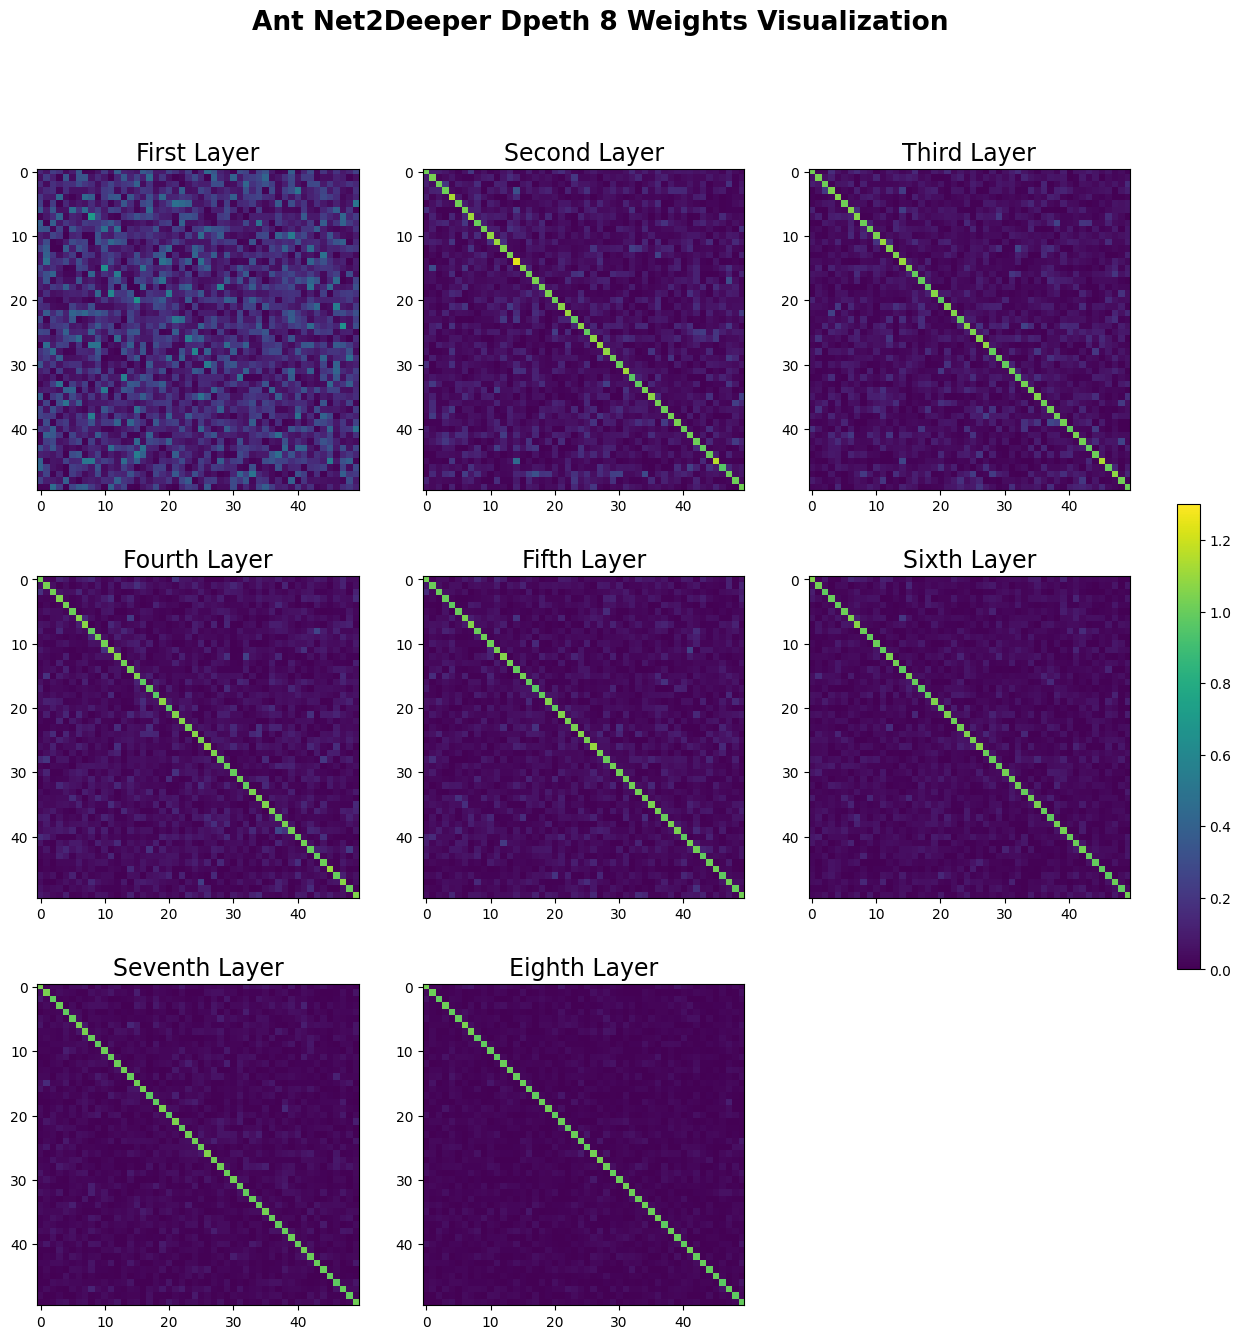

In [38]:
# Subplot with 3 figures horically
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Delete last subplot
fig.delaxes(axs[2, 2])

# First layer weights
im0 = axs[0, 0].imshow(first_layer_weights, cmap='viridis', vmin = 0, vmax = 1.3)
axs[0, 0].set_title('First Layer', fontsize=17)

# Second layer weights
im1 = axs[0, 1].imshow(second_layer_weights, cmap='viridis', vmin = 0, vmax = 1.3)
axs[0, 1].set_title('Second Layer', fontsize=17)

# Third layer weights
im2 = axs[0, 2].imshow(third_layer_weights, cmap='viridis', vmin = 0, vmax = 1.3)
axs[0, 2].set_title('Third Layer', fontsize=17)

# Fourth layer weights
im3 = axs[1, 0].imshow(fourth_layer_weights, cmap='viridis', vmin = 0, vmax = 1.3)
axs[1, 0].set_title('Fourth Layer', fontsize=17)

# Fifth layer weights
im4 = axs[1, 1].imshow(fifth_layer_weights, cmap='viridis', vmin = 0, vmax = 1.3)
axs[1, 1].set_title('Fifth Layer', fontsize=17)

# Sixth layer weights
im5 = axs[1, 2].imshow(sixth_layer_weights, cmap='viridis', vmin = 0, vmax = 1.3)
axs[1, 2].set_title('Sixth Layer', fontsize=17)

# Seventh layer weights
im6 = axs[2, 0].imshow(seventh_layer_weights, cmap='viridis', vmin = 0, vmax = 1.3)
axs[2, 0].set_title('Seventh Layer', fontsize=17)

# Eighth layer weights
im7 = axs[2, 1].imshow(eighth_layer_weights, cmap='viridis', vmin = 0, vmax = 1.3)
axs[2, 1].set_title('Eighth Layer', fontsize=17)


# Add colorbar for axs[2]
fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
plt.suptitle('Ant Net2Deeper Dpeth 8 Weights Visualization', fontsize=19, fontweight='bold')
plt.savefig('plotting/network_weights/ant/weights_8.png', bbox_inches='tight')

# Ant Net2Deeper Depth 4

In [39]:
base_path = 'fehring_growing_nn_new_seeded/ant_net2deeper/9/(256, 0.2, None, 0.0028277130573217566, 0.95, 0.00016765626422149914, 0.5, 12, 2048, True, 0.001, 0.99)/4/0/model.zip'
data, params, pytorch_variables = load_from_zip_file(base_path)

In [40]:
first_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.0.weight"]
first_layer_weights = np.abs(first_layer_weights)
first_layer_weights = first_layer_weights[:50, :50]
# Second layer weights
second_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.2.weight"]
second_layer_weights = np.abs(second_layer_weights)
second_layer_weights = second_layer_weights[:50, :50]
# third layer weights
third_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.4.weight"]
third_layer_weights = np.abs(third_layer_weights)
third_layer_weights = third_layer_weights[:50, :50]
# fourth layer weights
fourth_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.6.weight"]
fourth_layer_weights = np.abs(fourth_layer_weights)
fourth_layer_weights = fourth_layer_weights[:50, :50]

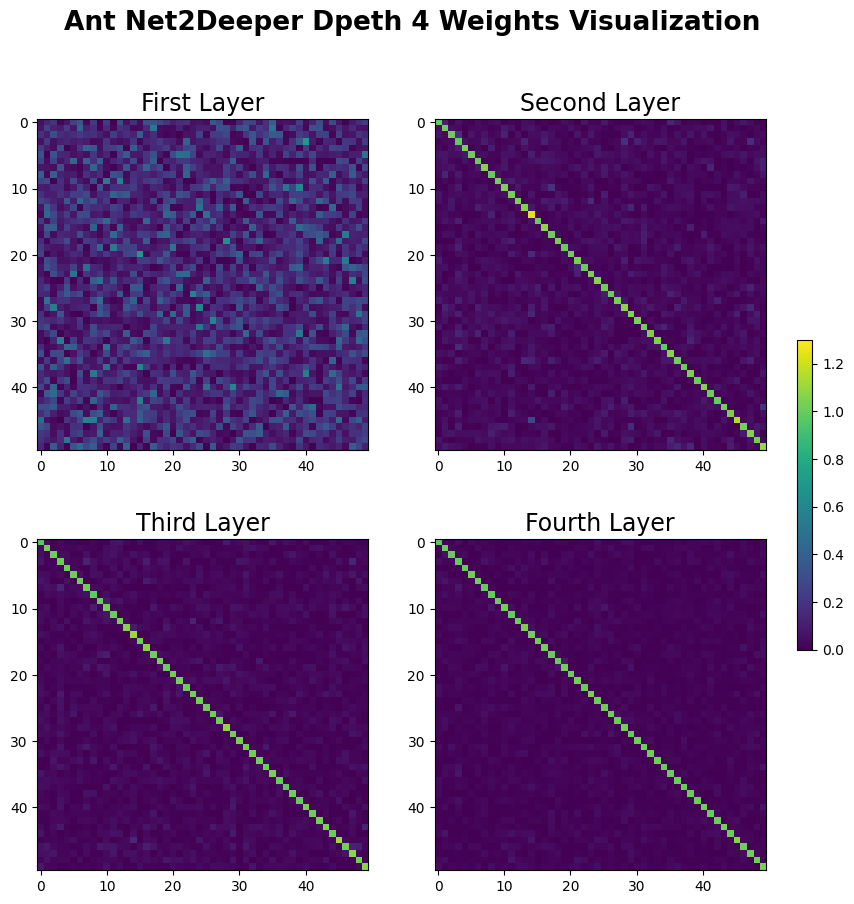

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# First layer weights
im0 = axs[0, 0].imshow(first_layer_weights, cmap='viridis', vmin = 0, vmax = 1.3)
axs[0, 0].set_title('First Layer', fontsize=17)

# Second layer weights
im1 = axs[0, 1].imshow(second_layer_weights, cmap='viridis', vmin = 0, vmax = 1.3)
axs[0, 1].set_title('Second Layer', fontsize=17)

# Third layer weights
im2 = axs[1, 0].imshow(third_layer_weights, cmap='viridis', vmin = 0, vmax = 1.3)
axs[1, 0].set_title('Third Layer', fontsize=17)

# Fourth layer weights
im3 = axs[1, 1].imshow(fourth_layer_weights, cmap='viridis', vmin = 0, vmax = 1.3)
axs[1, 1].set_title('Fourth Layer', fontsize=17)

# Add colorbar for axs[2]
fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
plt.suptitle('Ant Net2Deeper Dpeth 4 Weights Visualization', fontsize=19, fontweight='bold')
plt.savefig('plotting/network_weights/ant/weights_4.png', bbox_inches='tight')